<h1 style="color:#FB4834;"> 01 - Exploration <h1/>

This notebook performs Exploratory Data Analysis on the fraud detection dataset.

**Key objectives**:
- Initial data inspection and quality assessment
- Analysis of feature distributions and patterns
- Investigation of relationships between features and fraudulent transactions

***

### Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Formatting
plt.style.use('seaborn-v0_8')  
sns.set_theme(style="whitegrid", font_scale=1.2)  
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'figure.dpi': 100,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 2,
    'grid.alpha': 0.3
})

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.5f}'.format)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Suppress warnings
warnings.filterwarnings('ignore')


### Data Overview

In [3]:
RAW_DATA_PATH = '../data/raw/'
DATA_FILE = 'transactions.csv'
FILE_PATH = os.path.join(RAW_DATA_PATH, DATA_FILE)

if not os.path.exists(FILE_PATH):
    raise FileNotFoundError(f"Could not find file at {FILE_PATH}")

df_trans = pd.read_csv(FILE_PATH)

In [4]:
df_trans.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.07880,-81.17810,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.01129,-82.04832,0,4.97000,4.97000,0.00000,0.00000,True,78.77382,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.88780,-118.21050,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.15905,-118.18646,0,107.23000,107.23000,0.00000,0.00000,True,30.21662,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.18080,-112.26200,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.15070,-112.15448,0,220.11000,220.11000,0.00000,0.00000,True,108.10291,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.23060,-112.11380,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.03433,-112.56107,0,45.00000,45.00000,0.00000,0.00000,True,95.68512,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.42070,-79.46290,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.67500,-78.63246,0,41.96000,41.96000,0.00000,0.00000,True,77.70240,1,1,0,2019,6,1,1,1


In [5]:
print(f'Dataset has {df_trans.shape[0]:,} rows and {df_trans.shape[1]} features.')

print(df_trans.info())


Dataset has 1,852,394 rows and 35 features.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num 

In [6]:
missing_values = df_trans.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print(missing_values[missing_values > 0])

No missing values found in the dataset.


In [7]:
duplicate_count = df_trans.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")

Duplicate rows: 0


### Data Exploration

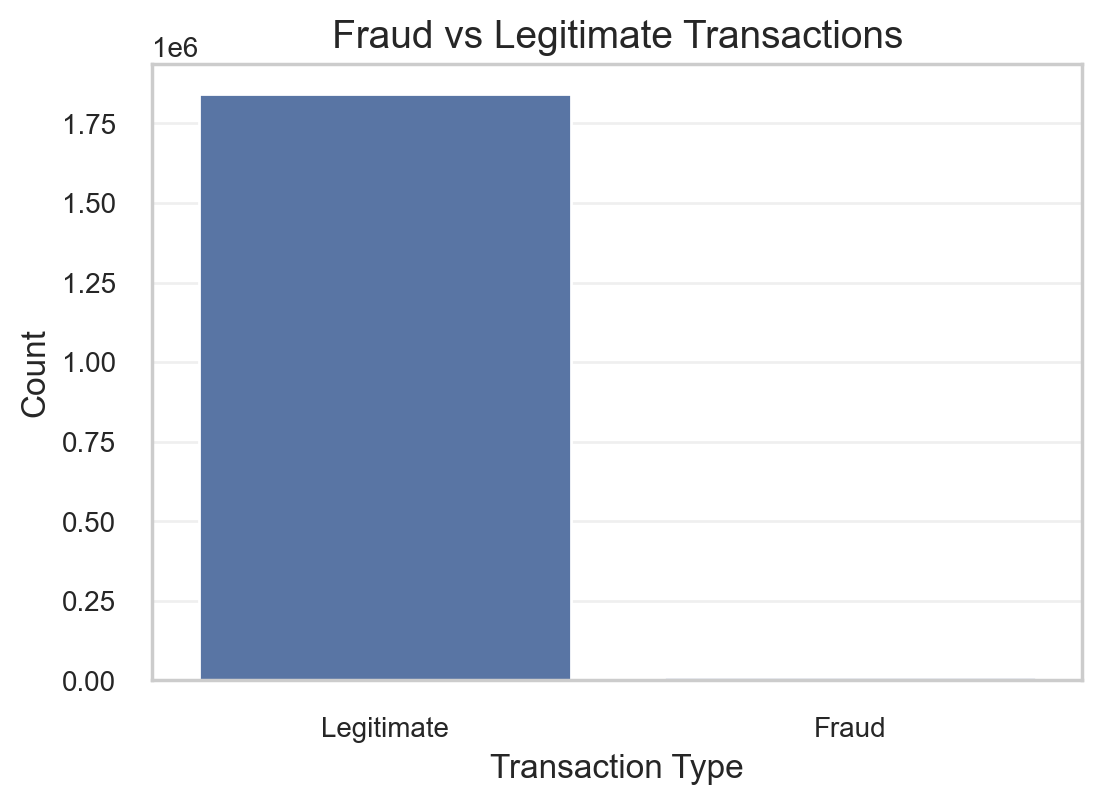

is_fraud
0    1842743
1       9651
Name: count, dtype: int64


In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df_trans)
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

print(df_trans['is_fraud'].value_counts())

There's quite a lot of class inbalance.


### Feature Separation

In [9]:
df = df_trans.copy()

# Drop identifier columns as they are not useful.
identifier_cols = ['cc_num', 'trans_num', 'first', 'last', 'street']
df.drop(columns=identifier_cols, inplace=True)

numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Features that are actually categorical...
categorical_numeric = ['zip', 'trans_month', 'trans_day', 'hour', 'year', 'is_fraud']

numerical_features = [col for col in numerical_features if col not in categorical_numeric]

categorical_features = df.select_dtypes(exclude=np.number).columns.tolist()
categorical_features.extend(categorical_numeric)

df_numerical = df[numerical_features]
df_categorical = df[categorical_features]

In [10]:
print('Numerical features: ', numerical_features)
print('Categorical features: ', categorical_features)

Numerical features:  ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'amt_month', 'amt_year', 'amt_month_shopping_net_spend', 'count_month_shopping_net', 'dist_between_client_and_merch', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year', 'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day']
Categorical features:  ['merchant', 'category', 'gender', 'city', 'state', 'job', 'dob', 'first_time_at_merchant', 'zip', 'trans_month', 'trans_day', 'hour', 'year', 'is_fraud']


### Numerical Features

In [11]:
summary_stats = df.groupby('is_fraud')[numerical_features].agg(['mean', 'median']).T # Transpose for better readability
print(summary_stats)

is_fraud                                              0                1
amt                             mean           67.65128        530.66141
                                median         47.24000        390.00000
lat                             mean           38.53825         38.74281
                                median         39.35430         39.53700
long                            mean          -90.22885        -90.03373
                                median        -87.47690        -87.04360
city_pop                        mean        88636.57928      89998.42296
                                median       2443.00000       2693.00000
unix_time                       mean   1358691769.69295 1355323092.34017
                                median 1357122894.00000 1355275650.00000
merch_lat                       mean           38.53795         38.73496
                                median         39.36808         39.51642
merch_long                      mean          -90.2

Several things stand out:
- Average times shopped at merchant: 3.99 for fraud vs 5.30 for legitimate.
- Fraudulent transactions have substantially higher average amounts ($530.66) compared to legitimate ones ($67.65).
- Monthly shopping net spend is also dramatically higher ($1,375 vs $370).
- Interestingly, annual spending is **lower** for accounts with fraud.

### Distribution Shapes


Given the imbalance I'll use density plots and ECDFs for better comparison, this will allow us to understand *how* the distributions differ. <h1/>




In [12]:
def compare_distributions(df, numeric_cols, n_cols=3):
    cols_to_plot = [col for col in numeric_cols if col != 'unix_time'] # Skip Unix Time.
    
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    
    if n_rows * n_cols == 1:
        axes = np.array([axes])
    
    axes = axes.flatten()
    
    for i, col in enumerate(cols_to_plot):
        sns.kdeplot(data=df[df['is_fraud'] == 0], x=col, ax=axes[i],
                   color='blue', label='Non-Fraud', fill=True, alpha=0.3, 
                   bw_adjust=1.2, common_norm=False)
        sns.kdeplot(data=df[df['is_fraud'] == 1], x=col, ax=axes[i],
                   color='red', label='Fraud', fill=True, alpha=0.3,
                   bw_adjust=1.2, common_norm=False)
        
        fraud_data = df[df['is_fraud'] == 1][col].dropna()
        non_fraud_data = df[df['is_fraud'] == 0][col].dropna()
        
        # Kolmogorov-Smirnov test for distribution difference.
        if len(fraud_data) > 5 and len(non_fraud_data) > 5:
            from scipy import stats
            ks_stat, p_val = stats.ks_2samp(fraud_data, non_fraud_data)
            axes[i].text(0.05, 0.95, f'KS p-value: {p_val:.3f}', transform=axes[i].transAxes,
                        bbox=dict(facecolor='white', alpha=0.8))
        
        unit = ""
        if 'amt' in col: unit = " ($)"
        elif col in ['lat', 'long', 'merch_lat', 'merch_long']: unit = " (°)"
        elif 'dist' in col: unit = " (km)"
        
        axes[i].set_title(f'{col}{unit}', fontsize=12)
        axes[i].legend()
    
    # Remove empty subplots
    for j in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[j])
        
    plt.suptitle('Distribution Comparison (Fraud vs Non-Fraud)', fontsize=16)
    plt.tight_layout()
    plt.show()

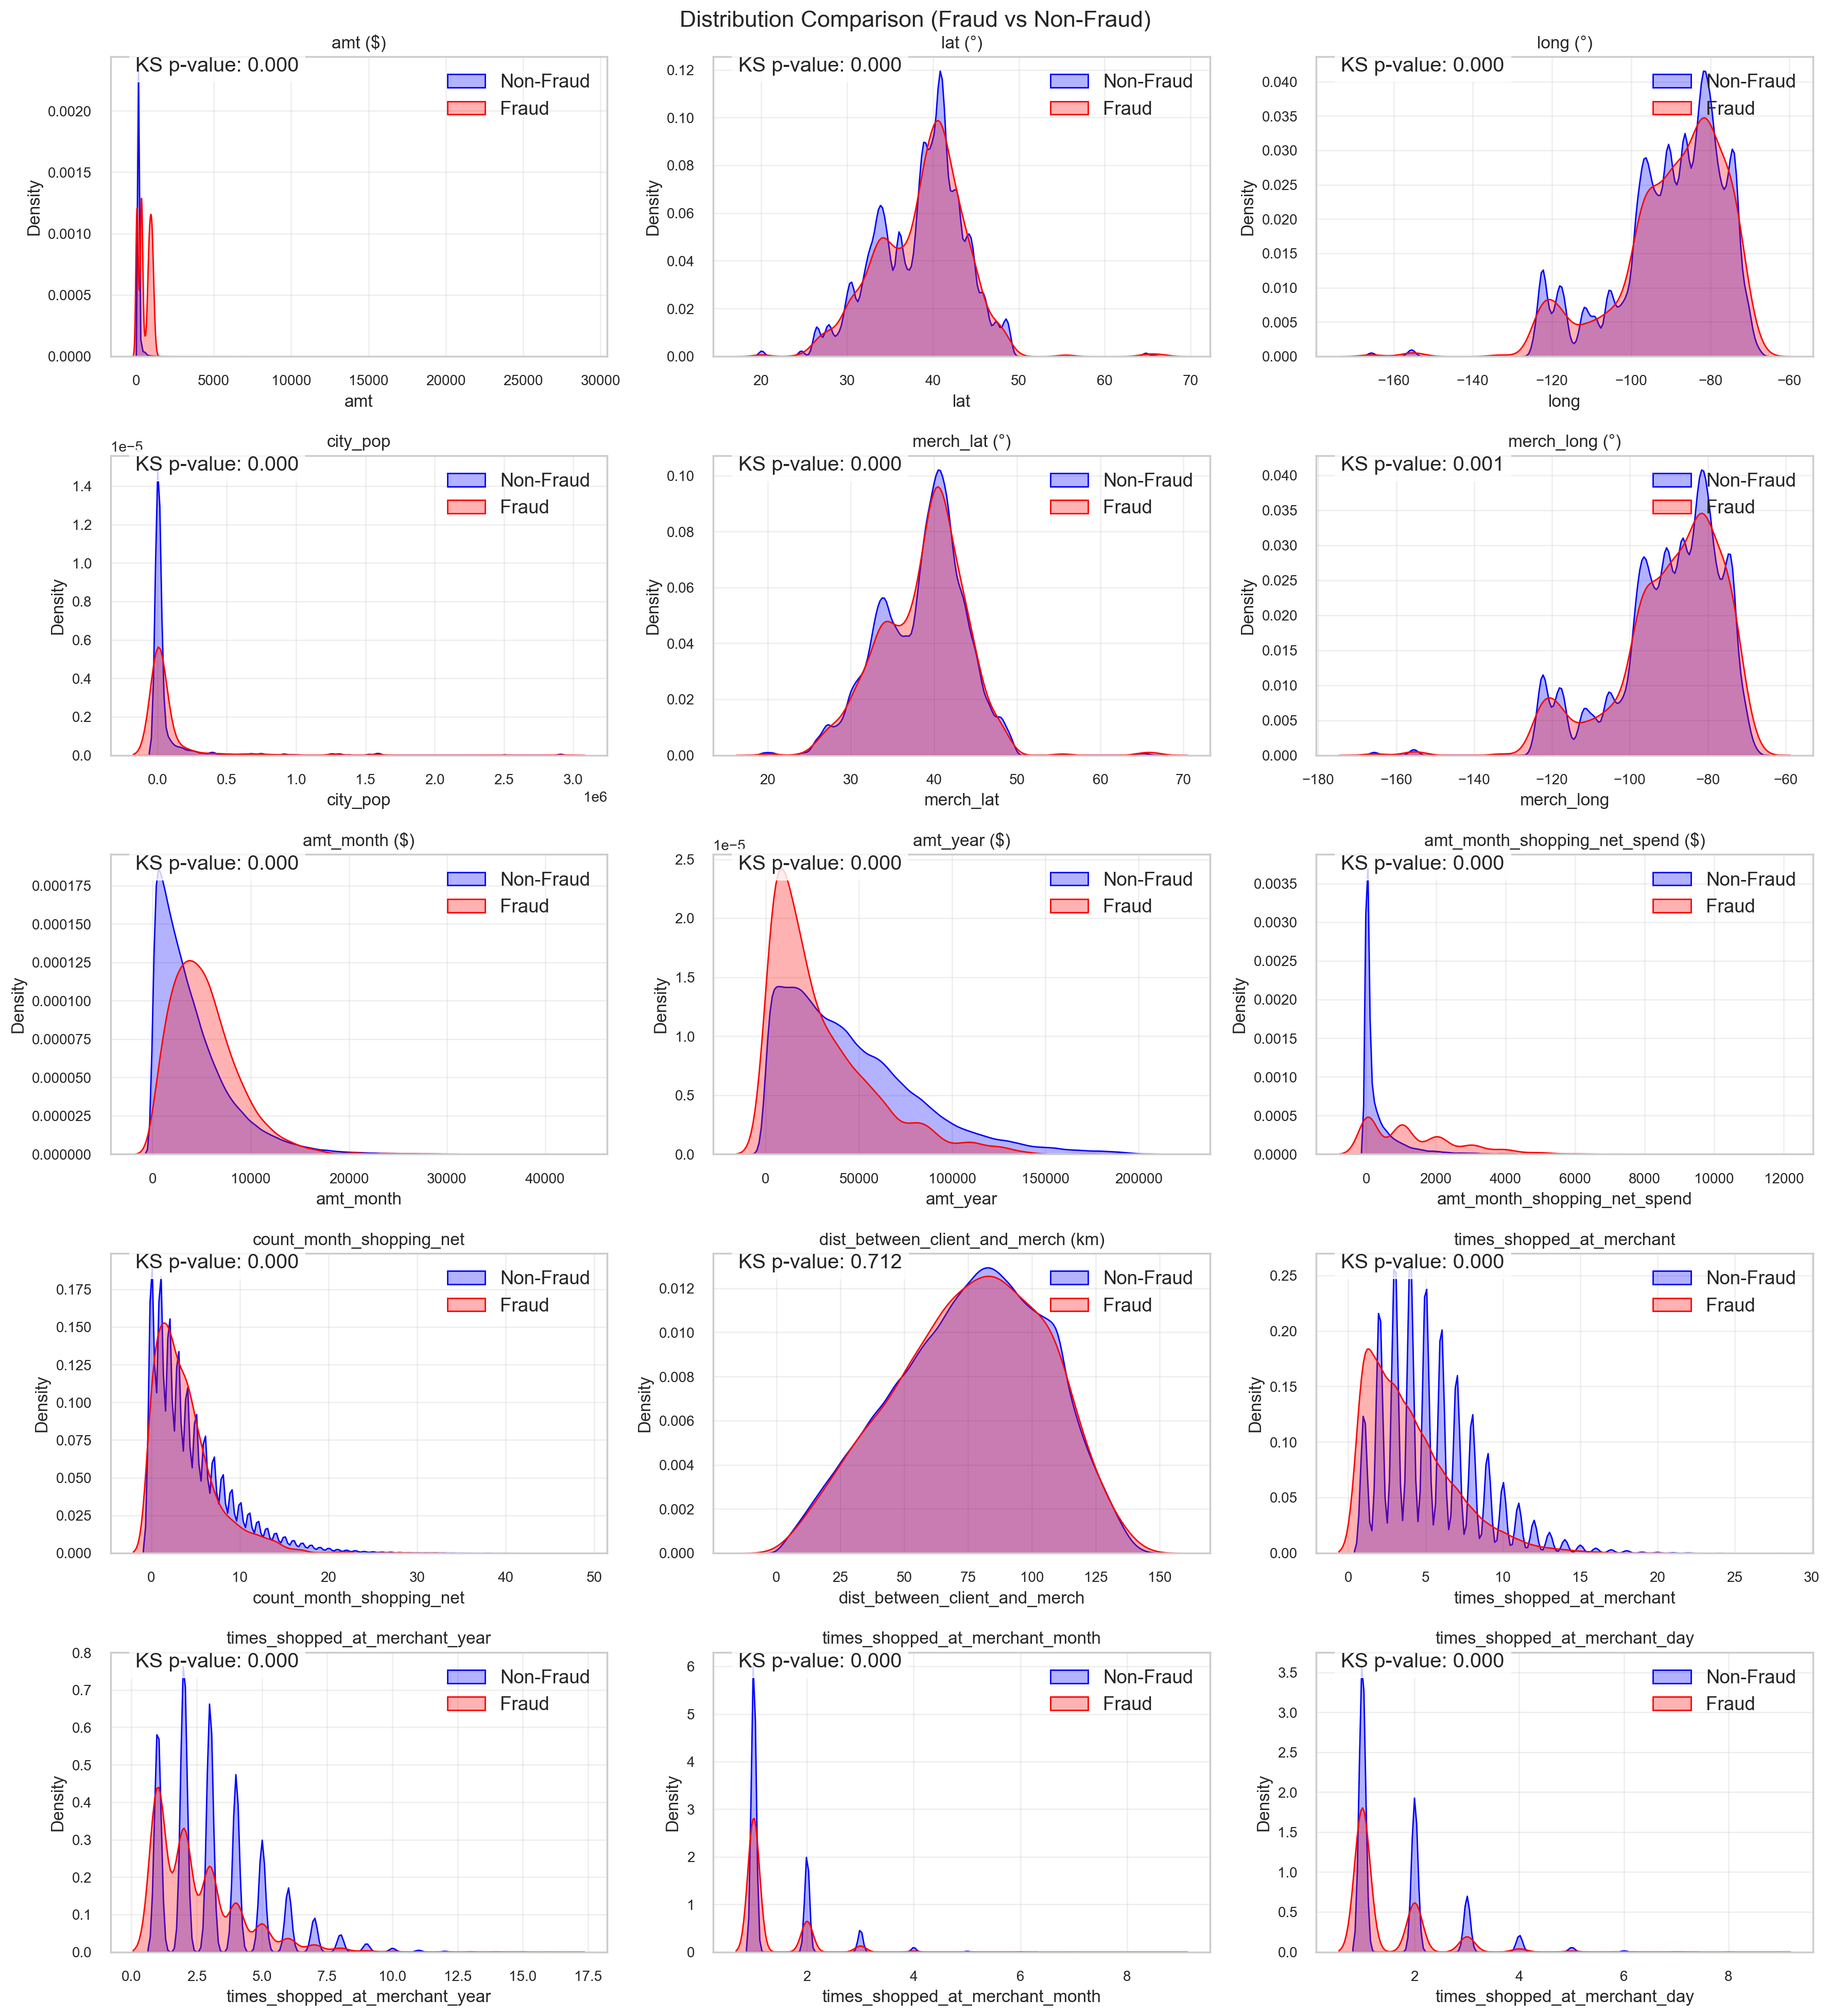

In [13]:
compare_distributions(df, numerical_features)

For non-fraud transactions (blue), we see a highly jagged, comb-like distribution with pronounced peaks at integer values. This pattern indicates legitimate customers tend to have very precise, quantized numbers of interactions with merchants - exactly 3, 4, 5 visits, etc. This reflects natural human shopping behavior where customers develop regular, repeated patterns with familiar merchants, creating these distinct integer-value spikes.

In contrast, the fraud distribution (red) appears much smoother, with fewer pronounced peaks and more weight toward lower values. This smoothness suggests fraudsters don't establish the same consistent shopping patterns with specific merchants. The distribution peaks earlier (around 2-3 interactions) and declines more gradually, indicating fraudulent activities typically occur with newer merchant relationships before the account can establish the regular shopping cadence seen in legitimate transactions.

The city population plot shows both distributions concentrate in smaller cities, with fraudsters showing slightly more activity across more populated areas, possibly targeting diverse population centers to avoid detection patterns tied to specific locations.

### Categorical Features

In [15]:
cardinality = df[categorical_features].nunique().sort_values(ascending=False)
print(cardinality)

zip                       985
dob                       984
city                      906
merchant                  693
job                       497
state                      51
hour                       24
category                   14
trans_month                12
trans_day                   7
gender                      2
first_time_at_merchant      2
year                        2
is_fraud                    2
dtype: int64


In [17]:
low_cardinality_limit = 100
high_cardinality_cols = cardinality[cardinality > low_cardinality_limit].index.tolist()
low_cardinality_cols = cardinality[cardinality <= low_cardinality_limit].index.tolist()

print(f"\nLow Cardinality (<={low_cardinality_limit}): {low_cardinality_cols}")
print(f"High Cardinality (>{low_cardinality_limit}): {high_cardinality_cols}")

target = 'is_fraud'
# Ensure target is not in these lists
if target in low_cardinality_cols: low_cardinality_cols.remove(target)
if target in high_cardinality_cols: high_cardinality_cols.remove(target)



Low Cardinality (<=100): ['state', 'hour', 'category', 'trans_month', 'trans_day', 'gender', 'first_time_at_merchant', 'year', 'is_fraud']
High Cardinality (>100): ['zip', 'dob', 'city', 'merchant', 'job']


In [27]:
print("\n--- Fraud Rate (%) per Category (Low Cardinality Features) ---")
fraud_rate_summary_low = {}
for col in low_cardinality_cols:
    fraud_rate = df.groupby(col)[target].mean().sort_values(ascending=False) * 100
    print(f"\n--- Fraud Rate for {col} ---")
    print(fraud_rate)
    fraud_rate_summary_low[col] = fraud_rate # Store for later summary


--- Fraud Rate (%) per Category (Low Cardinality Features) ---

--- Fraud Rate for state ---
state
DE   100.00000
RI     2.01342
AK     1.68748
OR     0.74599
NH     0.67366
VA     0.65380
TN     0.63822
NE     0.62745
MN     0.61629
NY     0.61129
DC     0.60429
KS     0.58593
NV     0.58327
CO     0.58181
ME     0.57184
SC     0.56553
MS     0.56294
FL     0.54957
IN     0.54883
GA     0.54633
WI     0.54626
IA     0.54376
MD     0.54358
KY     0.54171
OH     0.54032
OK     0.52562
SD     0.52350
IL     0.52080
NM     0.51650
CT     0.51006
PA     0.50099
CA     0.49941
MA     0.49539
MO     0.47720
AL     0.47504
WA     0.46598
NJ     0.45828
MI     0.45423
NC     0.45208
HI     0.43848
TX     0.43765
AR     0.43711
WY     0.42843
VT     0.42827
AZ     0.41661
ID     0.41070
MT     0.41057
WV     0.39968
UT     0.39721
ND     0.39654
LA     0.37726
Name: is_fraud, dtype: float64

--- Fraud Rate for hour ---
hour
22   2.60145
23   2.54635
0    1.35685
1    1.34844
3    1.31708
2    

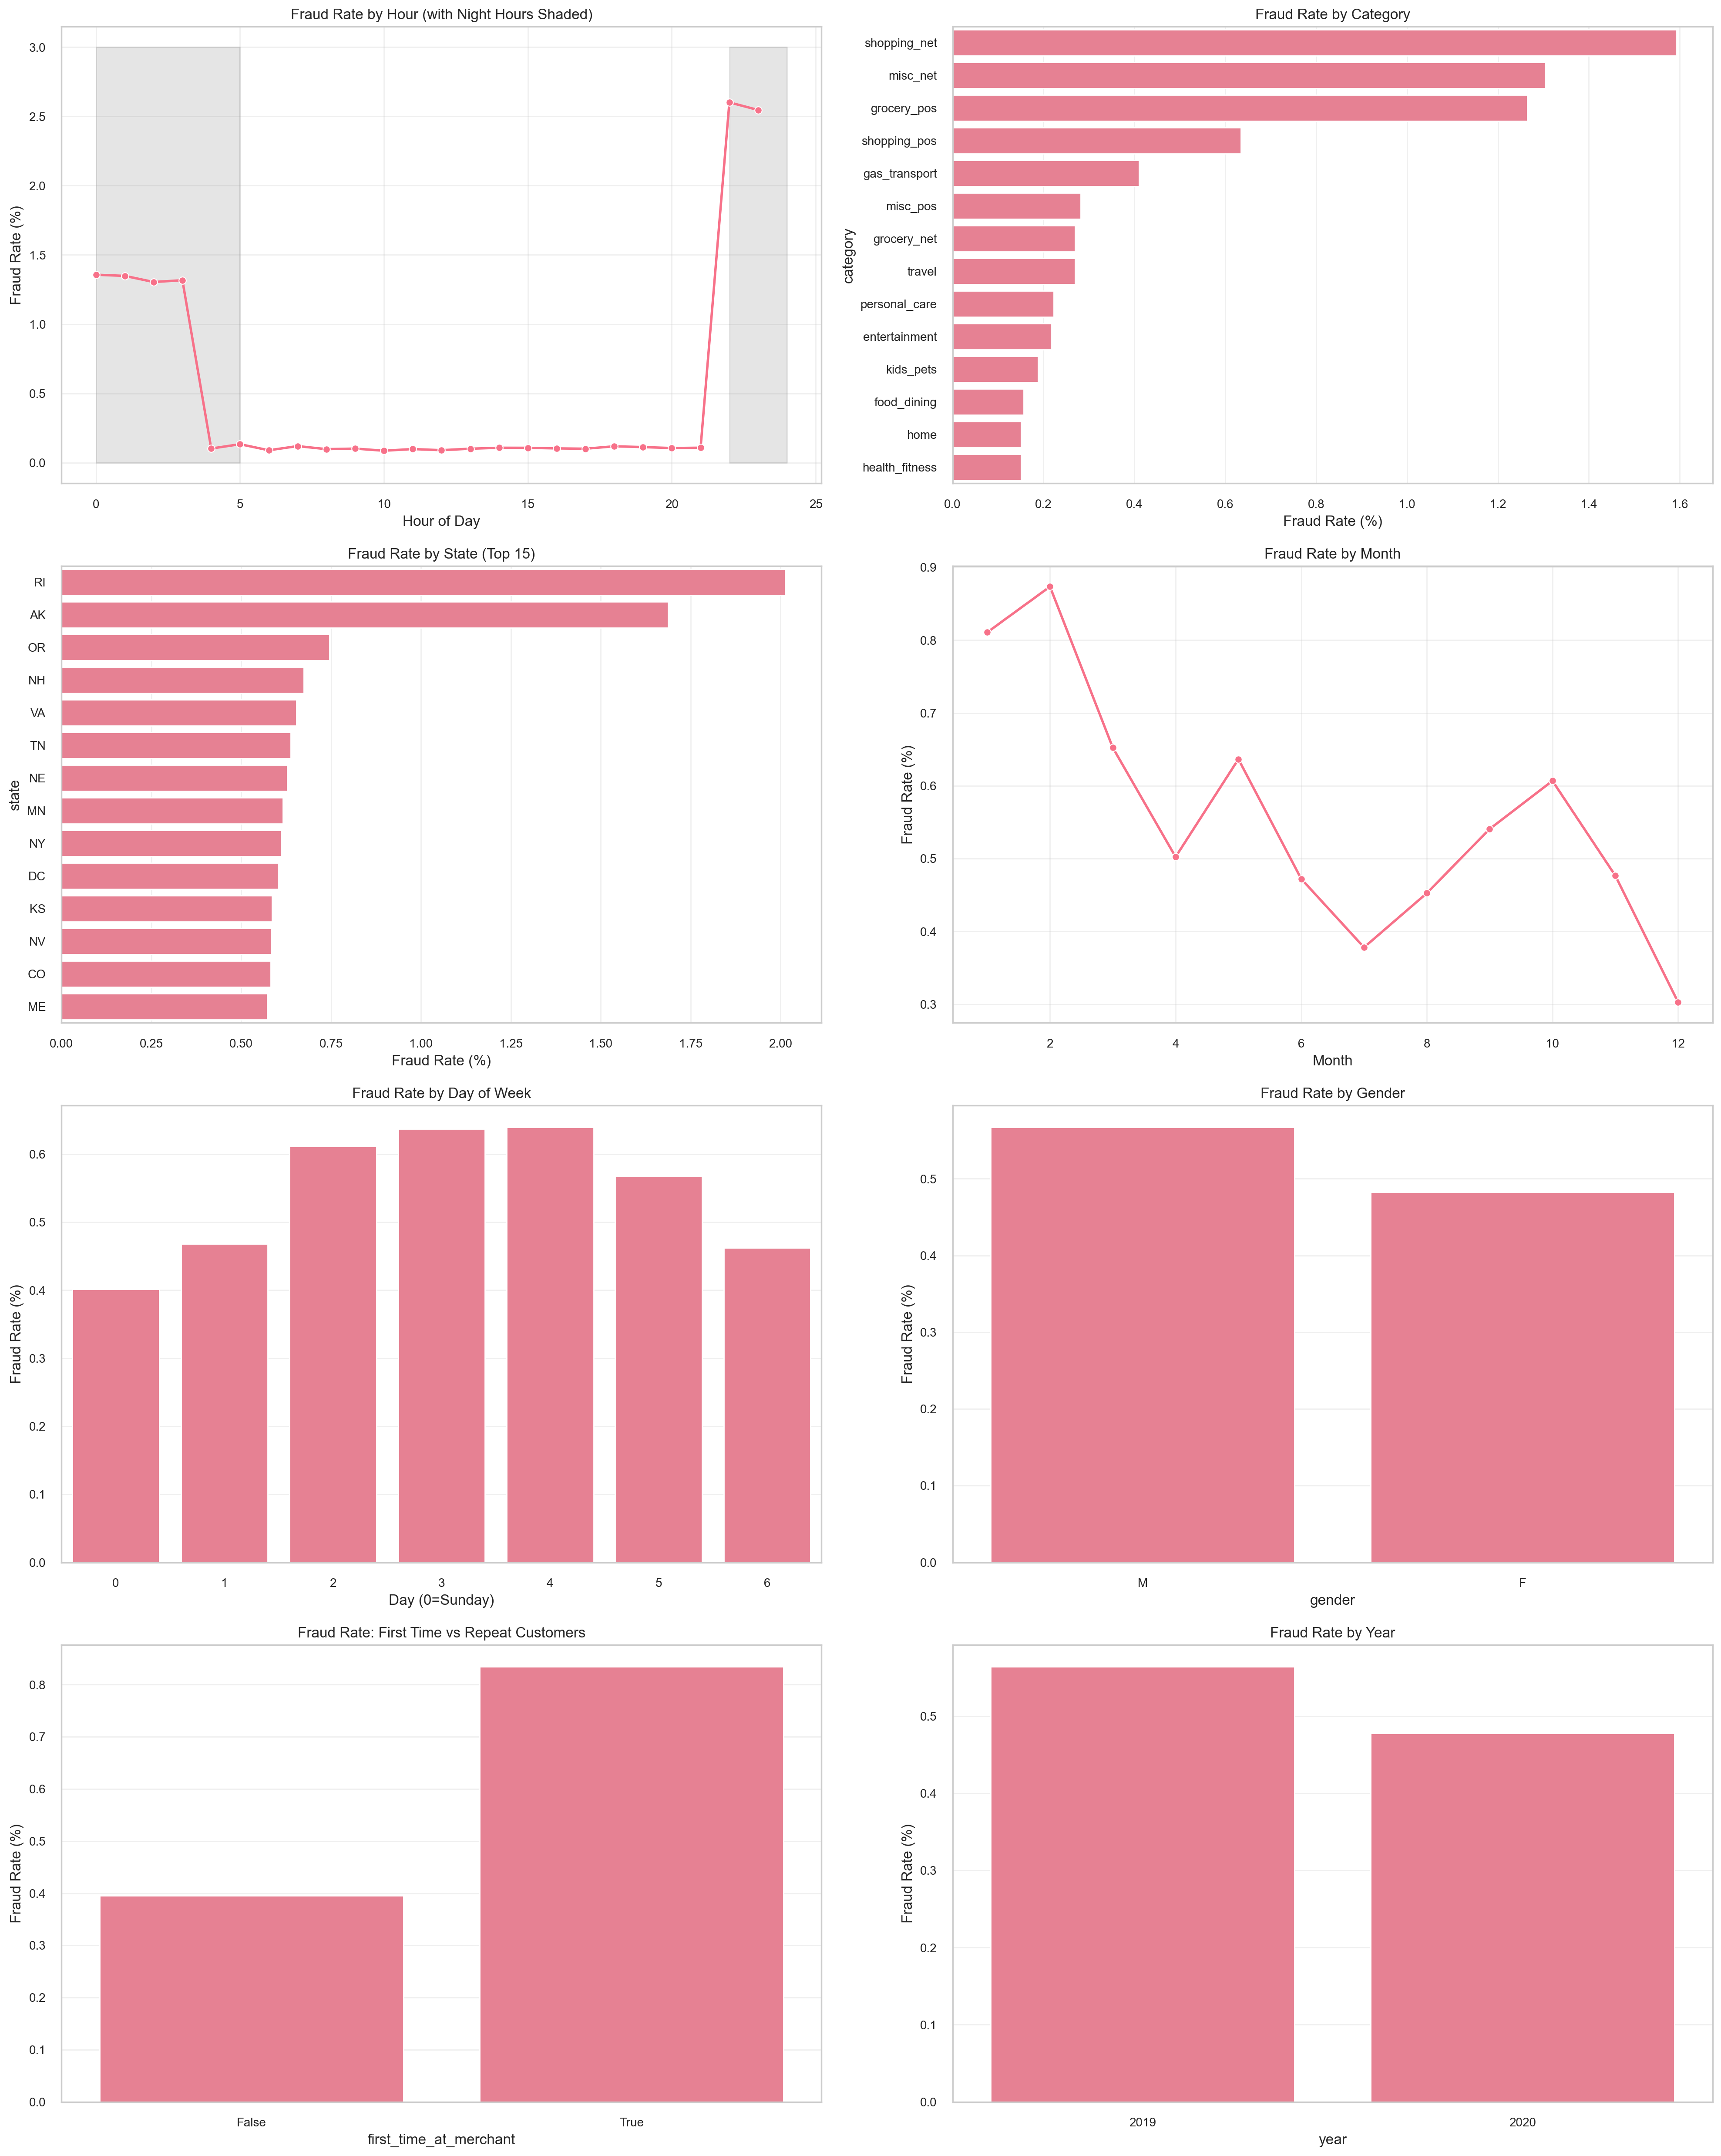

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(20, 25))

# 1. Hourly Fraud Rate
ax1 = plt.subplot(421)
hour_data = fraud_rate_summary_low['hour']
sns.lineplot(x=hour_data.index, y=hour_data.values, marker='o')
# Add shading for night hours (22-5)
ax1.fill_between([22, 24], 0, 3, alpha=0.2, color='gray')
ax1.fill_between([0, 5], 0, 3, alpha=0.2, color='gray')
plt.title('Fraud Rate by Hour (with Night Hours Shaded)', fontsize=12)
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate (%)')

# 2. Category Fraud Rate
ax2 = plt.subplot(422)
category_data = fraud_rate_summary_low['category']
# Using sns.barplot with horizontal orientation
sns.barplot(y=category_data.index, x=category_data.values)
plt.title('Fraud Rate by Category', fontsize=12)
plt.xlabel('Fraud Rate (%)')

# 3. State Fraud Rate
ax3 = plt.subplot(423)
state_data = fraud_rate_summary_low['state'].head(15)
state_data = state_data[state_data.index != 'DE']
# Using sns.barplot with horizontal orientation
sns.barplot(y=state_data.index, x=state_data.values)
plt.title('Fraud Rate by State (Top 15)', fontsize=12)
plt.xlabel('Fraud Rate (%)')

# 4. Monthly Trend
ax4 = plt.subplot(424)
month_data = fraud_rate_summary_low['trans_month']
sns.lineplot(x=month_data.index, y=month_data.values, marker='o')
plt.title('Fraud Rate by Month', fontsize=12)
plt.xlabel('Month')
plt.ylabel('Fraud Rate (%)')

# 5. Day of Week Pattern
ax5 = plt.subplot(425)
day_data = fraud_rate_summary_low['trans_day']
sns.barplot(x=day_data.index, y=day_data.values)
plt.title('Fraud Rate by Day of Week', fontsize=12)
plt.xlabel('Day (0=Sunday)')
plt.ylabel('Fraud Rate (%)')

# 6. Gender Comparison
ax6 = plt.subplot(426)
gender_data = fraud_rate_summary_low['gender']
sns.barplot(x=gender_data.index, y=gender_data.values)
plt.title('Fraud Rate by Gender', fontsize=12)
plt.ylabel('Fraud Rate (%)')

# 7. First Time vs Repeat Customer
ax7 = plt.subplot(427)
first_time_data = fraud_rate_summary_low['first_time_at_merchant']
sns.barplot(x=first_time_data.index, y=first_time_data.values)
plt.title('Fraud Rate: First Time vs Repeat Customers', fontsize=12)
plt.ylabel('Fraud Rate (%)')

# 8. Year Comparison
ax8 = plt.subplot(428)
year_data = fraud_rate_summary_low['year']
sns.barplot(x=year_data.index, y=year_data.values)
plt.title('Fraud Rate by Year', fontsize=12)
plt.ylabel('Fraud Rate (%)')

# Adjust layout
plt.tight_layout()
plt.show()

#### **Key Insights**

**Time-Related Patterns:** Fraud peaks during late night, especially from 22:00–23:00 (>2.5%) and 00:00–03:00 (>1.3%), while daytime hours (05:00–21:00) show much lower fraud rates (~0.1%).

**Transaction Categories:** Online transactions, especially shopping (`shopping_net` at 1.59%), have higher fraud rates than in-person. Low-risk categories include `health_fitness`, `home`, and `food_dining` (all around 0.15–0.16%).

**Geographic Patterns:** Delaware (DE) shows a 100% fraud rate, possibly due to a data anomaly or small sample. RI and AK also have high rates (>1.5%), while LA has the lowest at 0.38%.

**Customer Behavior:** First-time merchant transactions are riskier (0.83%) compared to repeats (0.40%). Male accounts have a slightly higher fraud rate (0.57%) than female (0.48%).

**Seasonal Patterns:** Fraud is more common in January–February (>0.8%) and lowest in December (0.30%). The year 2019 saw more fraud (0.56%) than 2020 (0.48%).

**Day of Week:** Mid-week (Tuesday–Thursday) has higher fraud (~0.6%), while weekends (Sunday and Saturday) are safer (~0.4%).


In [32]:
# TODO: high cardinality features analysis


### Correlation Analysis

In [33]:
df_corr = df.copy()

# Ensure target is numeric (0/1)
if df_corr[target].dtype == 'bool':
    df_corr[target] = df_corr[target].astype(int)
elif not pd.api.types.is_numeric_dtype(df_corr[target]):
     # If it's string 'True'/'False' etc. - needs specific conversion
     # Example: df_corr[target] = df_corr[target].map({'True': 1, 'False': 0}) # Adjust mapping as needed
     print(f"Warning: Target column '{target}' is not boolean or numeric. Attempting conversion if possible, otherwise correlation might fail.")
     # Add specific conversion logic here based on your data's format if needed

In [34]:
df_corr = pd.get_dummies(df_corr, columns=low_cardinality_cols, drop_first=True, dummy_na=False)

In [35]:
df_corr = df_corr.drop(columns=high_cardinality_cols, errors='ignore')

Shape after encoding for correlation: (1852394, 17)

--- Calculating Correlation Matrix ---

--- Correlation of Features with Target ('is_fraud') ---
amt                                0.20931
amt_month_shopping_net_spend       0.09967
amt_month                          0.02168
lat                                0.00290
merch_lat                          0.00278
long                               0.00102
merch_long                         0.00100
dist_between_client_and_merch      0.00036
city_pop                           0.00033
count_month_shopping_net          -0.01213
times_shopped_at_merchant_month   -0.01226
unix_time                         -0.01333
times_shopped_at_merchant_day     -0.01606
times_shopped_at_merchant_year    -0.02543
times_shopped_at_merchant_year    -0.02543
times_shopped_at_merchant         -0.03061
amt_year                          -0.03181
amt_year                          -0.03181
Name: is_fraud, dtype: float64


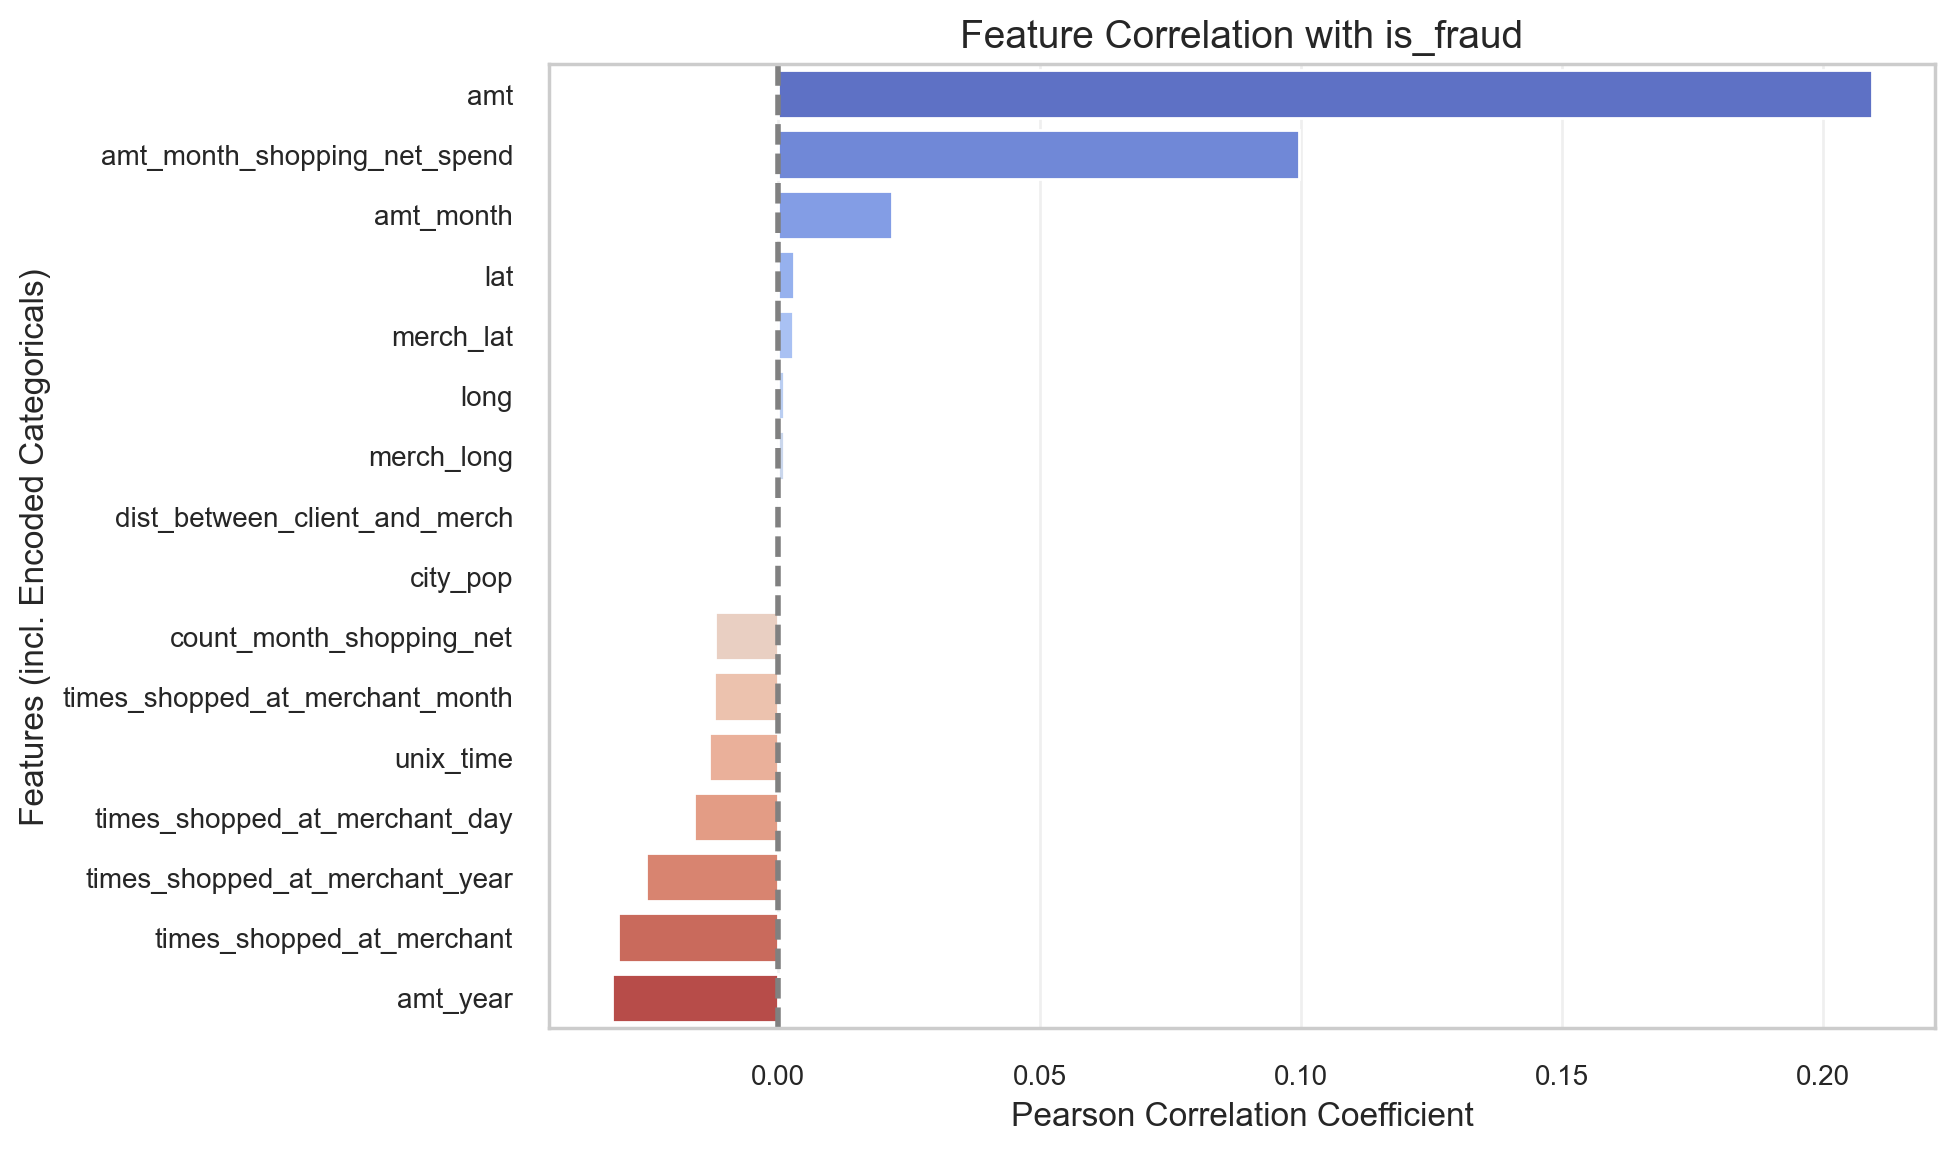

In [38]:
features_for_corr = numerical_features + [col for col in df_corr.columns if any(cat_col in col for cat_col in low_cardinality_cols)]
# Ensure target is included if not already present (it should be)
if target not in df_corr.columns:
     raise ValueError("Target column missing after encoding steps.")


print(f"Shape after encoding for correlation: {df_corr.shape}")
# Make sure only numeric types remain for correlation calculation
non_numeric_cols = df_corr[features_for_corr + [target]].select_dtypes(exclude=np.number).columns
if len(non_numeric_cols) > 0:
    print(f"Warning: Non-numeric columns remaining: {non_numeric_cols}. Dropping them for correlation.")
    df_corr = df_corr.drop(columns=non_numeric_cols)
    features_for_corr = [col for col in features_for_corr if col not in non_numeric_cols]

# %%
# --- Calculate Correlation Matrix ---
print("\n--- Calculating Correlation Matrix ---")
if len(features_for_corr) > 1: # Need at least two columns to correlate
    correlation_matrix = df_corr[features_for_corr + [target]].corr()

    # --- Correlation with Target Variable ---
    corr_with_target = correlation_matrix[target].sort_values(ascending=False)
    # Remove target from correlation results
    corr_with_target = corr_with_target[corr_with_target.index != target]
    print(f"\n--- Correlation of Features with Target ('{target}') ---")
    print(corr_with_target)

    # --- Visualize Correlation with Target ---
    plt.figure(figsize=(10, max(6, len(corr_with_target) * 0.2))) # Adjust height based on number of features
    sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette='coolwarm')
    plt.title(f'Feature Correlation with {target}')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('Features (incl. Encoded Categoricals)')
    plt.axvline(x=0, color='grey', linestyle='--') # Add line at zero correlation
    plt.tight_layout()
    plt.show()

else:
    print("Not enough numeric features available to calculate correlation matrix.")

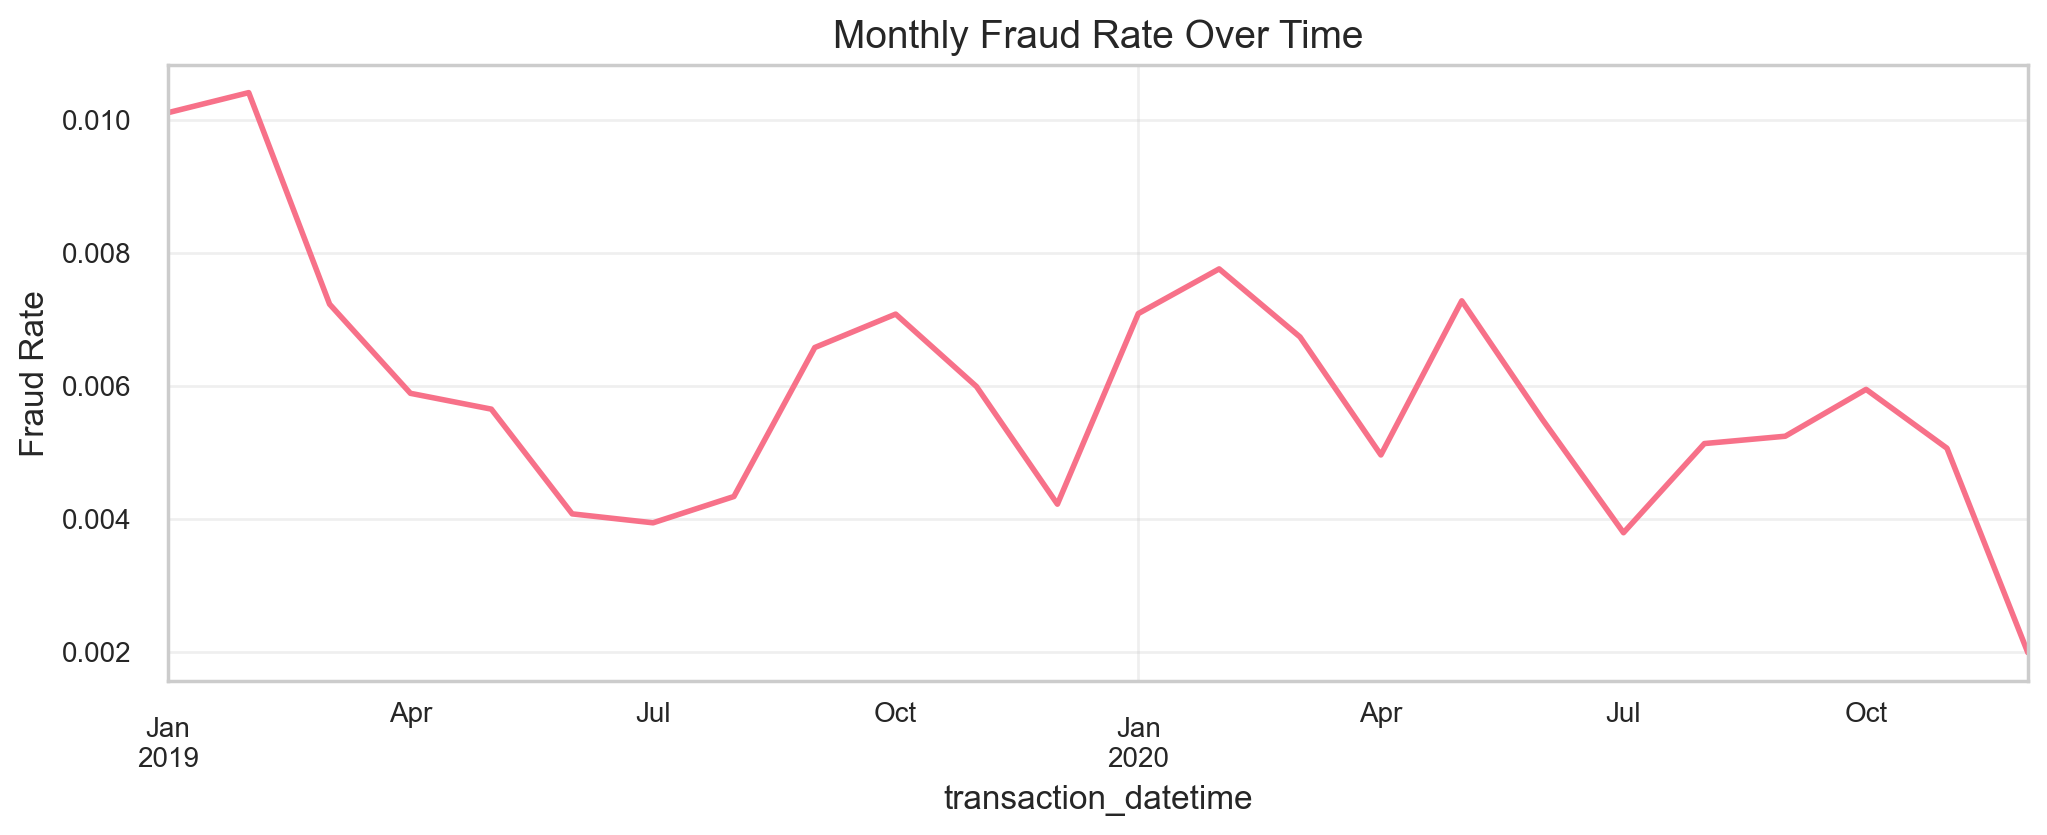

In [45]:
try:
    df['transaction_datetime'] = pd.to_datetime(df[['year', 'trans_month', 'trans_day', 'hour']].rename(columns={'trans_month':'month', 'trans_day':'day'}), errors='coerce')
    df['transaction_date'] = df['transaction_datetime'].dt.date
except Exception as e:
    print(f"Error creating datetime object: {e}")

if 'transaction_datetime' in df.columns:
    df.set_index('transaction_datetime', inplace=True) # Optional, but useful for resampling
    fraud_over_time = df['is_fraud'].resample('M').agg(['count', 'sum', 'mean']) # Monthly count, fraud count, fraud rate
    fraud_over_time['mean'].plot(title='Monthly Fraud Rate Over Time', figsize=(12,4))
    plt.ylabel('Fraud Rate')
    plt.show()
    df.reset_index(inplace=True) # Reset index if needed later